In [1]:
from pandas import read_csv, datetime, DataFrame
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

%matplotlib inline

In [2]:
# function used to parse a string representing a time according to a format '%Y-%m'.
def parser(x) :
    return datetime.strptime('190'+x, '%Y-%m')

In [10]:
# Generate a series using csv file which contains data of shampoo sales for three years# Gener 
series = read_csv('sales-of-shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [11]:

#read the header of series#read t 
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [12]:
#Ignore displaying warnings
warnings.filterwarnings("ignore")

Text(0,0.5,'Sales')

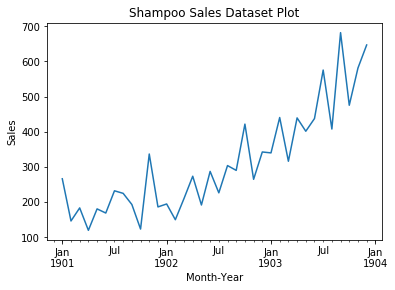

In [13]:
#Plot sales data w.r.t the three years data stored in series
series.plot()
pyplot.title('Shampoo Sales Dataset Plot')
pyplot.xlabel('Month-Year')
pyplot.ylabel('Sales')

Text(0.5,1,'Autocorrelation Plot of Shampoo Sales Data')

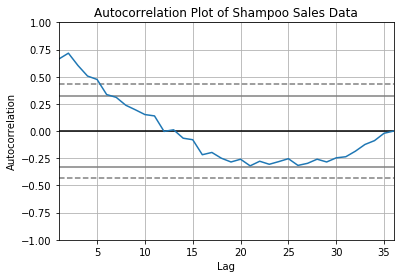

In [14]:
#autocorrelation for a large number of lags in the time series data
autocorrelation_plot(series)
pyplot.title('Autocorrelation Plot of Shampoo Sales Data')

In [15]:
# fit an ARIMA(5,1,0) model. 
# This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, 
# and uses a moving average model of 0.
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Wed, 10 Oct 2018   AIC                            406.340
Time:                                                 22:15:34   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

Text(0.5,1,'ARIMA Fit Residual Error Line Plot')

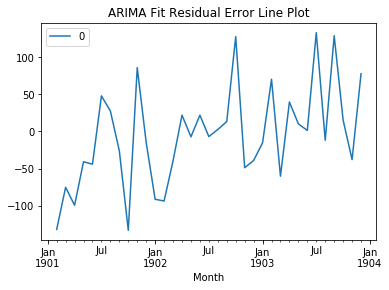

In [16]:
# plot residual errors, shows that there are still some information which is not captured by the model.
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.title('ARIMA Fit Residual Error Line Plot')

Text(0.5,1,'ARIMA Fit Residual Error Density Plot')

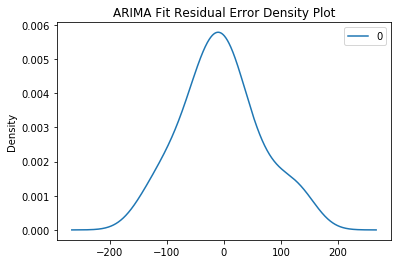

In [17]:
# density plot of the residual error values, shows that the errors are Gaussian, but may not be centered on zero.
residuals.plot(kind='kde')
pyplot.title('ARIMA Fit Residual Error Density Plot')

In [18]:
#Statistical information on the data with the ARIMA model applied
print(residuals.describe())

                0
count   35.000000
mean    -5.495124
std     68.132888
min   -133.296518
25%    -42.477818
50%     -7.186491
75%     24.748425
max    133.238054


In [19]:
# Make predictions using ARIMA model
X = series.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=386.308848, expected=439.300000
predicted=356.082083, expected=401.300000
predicted=446.379500, expected=437.400000
predicted=394.737290, expected=575.500000
predicted=434.915542, expected=407.600000
predicted=507.923407, expected=682.000000
predicted=435.482894, expected=475.300000
predicted=652.743733, expected=581.300000
predicted=546.343479, expected=646.900000


In [20]:
# Calculate MSE on ARIMA model
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 9495.393


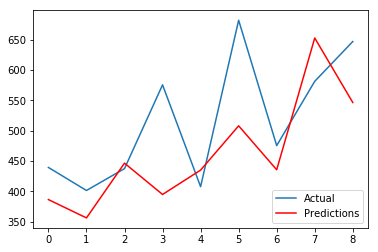

In [21]:
# plot Actual vs predicted sales data
pyplot.plot(test,label='Actual')
pyplot.plot(predictions, color='red', label='Predictions')
pyplot.legend(loc=4)